In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import matplotlib.dates as md

In [2]:
df = pd.read_parquet('escooter_history.parquet', engine='pyarrow')
df['weekday'] = pd.Series(df.datetime).dt.day_name()
df.workingday = 1
df.holiday = 0
# set Saturdays and Sundays not as Workingday
df.loc[df['weekday'].isin(['Saturday','Sunday']), 'workingday'] = 0

# set Tuesdays aans Wednesday as Workingday, but not as Holiday
df.loc[df['weekday'].isin(['Tuesday','Wednesday']), 'workingday'] = 1
df.loc[df['weekday'].isin(['Tuesday','Wednesday']), 'holiday'] = 0
# function to set Holidays to 1, Working Day to 0.
# List of Holidays
# Based on https://www.officeholidays.com/countries/usa/2019 , https://www.officeholidays.com/countries/usa/2020
holidays2019 = [(2019,1,1),(2019,1,21),(2019,2,18),(2019,5,27),(2019,7,4),(2019,9,2),(2019,10,14),(2019,11,11),(2019,11,28),(2019,12,25)]
holidays2020 = [(2020,1,1),(2020,1,20),(2020,2,17),(2020,5,25),(2020,7,3),(2020,7,4),(2020,9,7),(2020,10,12),(2020,11,11),(2020,11,26),(2020,12,25)]

def setHolidays (t):
    y = t[0]
    m = t[1]
    d = t[2]
    
    start = dt.datetime.strptime(f'{y}-{m}-{d} 00:00:00', '%Y-%m-%d %H:%M:%S')
    end = dt.datetime.strptime(f'{y}-{m}-{d+1} 00:00:00', '%Y-%m-%d %H:%M:%S')
 
    df.loc[(df.datetime >= start) & (df.datetime < end), 'holiday'] = 1
    df.loc[(df.datetime >= start) & (df.datetime < end), 'workingday'] = 0
for h in (holidays2019+holidays2020): 
    setHolidays(h) 

In [11]:
pd.crosstab(df.registered_customer,df.holiday , normalize='all', margins = True).round(3)

holiday,0,1,All
registered_customer,,,
False,0.181,0.006,0.187
True,0.789,0.023,0.813
All,0.971,0.029,1.000


In [10]:
pd.crosstab(df.registered_customer,df.workingday, normalize='all',margins=True).round(3)

workingday,0,1,All
registered_customer,,,
False,0.041,0.146,0.187
True,0.276,0.537,0.813
All,0.316,0.684,1.000


In [5]:
pd.crosstab(df.workingday,df.holiday  , normalize='all',margins=True)

holiday,0,1,All
workingday,,,
0,0.286981,0.029322,0.316304
1,0.683696,0.000000,0.683696
All,0.970678,0.029322,1.000000


In [6]:
pd.crosstab(df.registered_customer,df['workingday'] | df['holiday'], normalize = 'all', margins=True)

col_0,0,1,All
registered_customer,,,
False,0.034835,0.152314,0.187149
True,0.252146,0.560705,0.812851
All,0.286981,0.713019,1.000000


<AxesSubplot:xlabel='registered_customer', ylabel='count'>

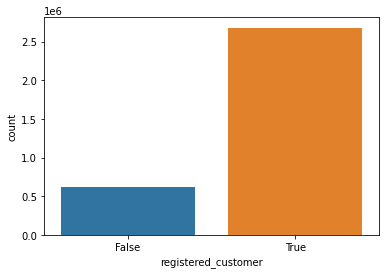

In [7]:
sns.countplot(data=df, x='registered_customer')